### Calcular randoms como siempre pero recortar a ojo para la correlación con deflectantes y no deflectantes

In [41]:
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
import healpy as hp
from astropy.io import ascii
import treecorr
import matplotlib.pyplot as plt
from auger_tools import generate_RandomCatalogue

# Read UHECR data
events_a8 = ascii.read('../data/Auger/events_a8_lb.dat')
eve = SkyCoord(events_a8['RA'], events_a8['dec'], frame='icrs', unit='degree')
mask_eve = np.where(abs(eve.galactic.b) > 5. * u.degree)[0]
events_a8 = events_a8[mask_eve]#[:10000]

# Read galaxy data
gxs = ascii.read('../data/VLS_ang5_cz_700control_def.txt')
gxs = gxs[gxs['cz'] > 1000.]
data = gxs

nmult = 10

# Calculations
ecat = treecorr.Catalog(ra=events_a8['RA'], dec=events_a8['dec'], ra_units='deg', dec_units='deg')
#seeds = np.linspace(1000,1+params['nquant']-1,params['nquant'],dtype=int)

# Generate ra_rand and dec_rand for rcat
ra_rand, dec_rand = generate_RandomCatalogue(data['_RAJ2000'], data['_DEJ2000'], nmult=nmult)

# Correctly create the random catalog
rcat = treecorr.Catalog(ra=ra_rand, dec=dec_rand, ra_units='deg', dec_units='deg')

print(len(data),len(ra_rand),len(events_a8))

1400 14000 29481


3.1403793337544337 -3.139548917596665
3.1403793337544337 -3.139548917596665


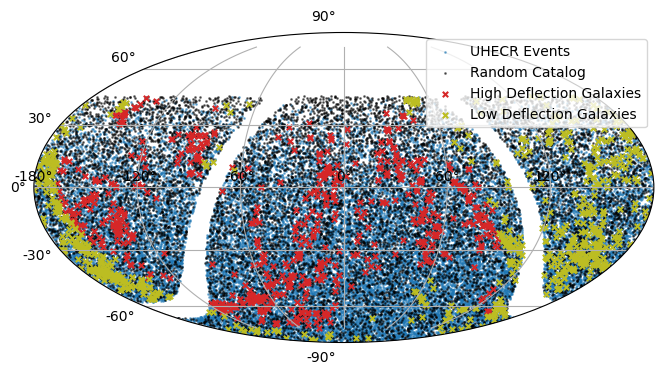

In [54]:

# Create figure with three Mollweide subplots
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'mollweide'}, figsize=(8, 6))

def format_axes(ax):
    """Format axes with RA in hours and Dec in degrees."""
    # RA ticks every 60 degrees (converted to hours)
    xticks_deg = np.arange(-180, 180, 60)
    xticks_rad = np.radians(xticks_deg)# - np.pi # Shift RA to center at 180 degrees
    xtick_labels = [f'{int(deg/15)}h' for deg in xticks_deg]
    ax.set_xticks(xticks_rad)
    ax.set_xticklabels([f'{deg}°' for deg in xticks_deg])
    
    # Dec ticks every 30 degrees
    yticks_deg = np.arange(-90, 91, 30)
    yticks_rad = np.radians(yticks_deg)
    ax.set_yticks(yticks_rad)
    ax.set_yticklabels([f'{deg}°' for deg in yticks_deg])
    ax.grid(True)


# Plot UHECR Events (ecat)
ra_ecat = events_a8['RA']
dec_ecat = events_a8['dec']
ra_ecat[ra_ecat > 180.] = ra_ecat[ra_ecat > 180.] - 360.
ra_rad_ecat = np.radians(ra_ecat)# - np.pi
dec_rad_ecat = np.radians(dec_ecat)
ax.scatter(ra_rad_ecat, dec_rad_ecat, s=1, color='C00', alpha=0.5, label='UHECR Events')
#ax.set_title('UHECR Events (ecat)', pad=20)
#format_axes(axes[1])

# Plot Random Catalog (rcat)
ra_rcat = ra_rand
dec_rcat = dec_rand
ra_rcat[ra_rcat > 180.] = ra_rcat[ra_rcat > 180.] - 360.
ra_rad_rcat = np.radians(ra_rcat)# - np.pi
dec_rad_rcat = np.radians(dec_rcat)
ax.scatter(ra_rad_rcat, dec_rad_rcat, s=1, color='k', alpha=.5, label='Random Catalog')
#ax.set_title('Random Catalog (rcat)', pad=20)
print(np.radians(ra_rcat.max()), np.radians(ra_rcat.min()))
print(ra_rad_rcat.max(), ra_rad_rcat.min())

# Plot Galaxy Data
ra_data_def = data['_RAJ2000'][gxs['deflection'] > 25.]
dec_data_def = data['_DEJ2000'][gxs['deflection'] > 25.]
ra_data_nodef = data['_RAJ2000'][gxs['deflection'] <= 25.]
dec_data_nodef = data['_DEJ2000'][gxs['deflection'] <= 25.]

ra_data_def[ra_data_def > 180.] = ra_data_def[ra_data_def > 180.] - 360.
ra_data_nodef[ra_data_nodef > 180.] = ra_data_nodef[ra_data_nodef > 180.] - 360.

ra_rad_def_data = np.radians(ra_data_def)# - np.pi
dec_rad_def_data = np.radians(dec_data_def)

ra_rad_nodef_data = np.radians(ra_data_nodef)# - np.pi
dec_rad_nodef_data = np.radians(dec_data_nodef)

ax.scatter(ra_rad_def_data, dec_rad_def_data, s=15, color='C03', marker='x', alpha=1, label='High Deflection Galaxies')
ax.scatter(ra_rad_nodef_data, dec_rad_nodef_data, s=15, color='C08', marker='x', alpha=1, label='Low Deflection Galaxies')
#ax.set_title('Galaxy Data', pad=20)

plt.legend(loc='upper right', fontsize=10)
format_axes(ax)
#plt.tight_layout()
plt.show()


### Cortes adicionales

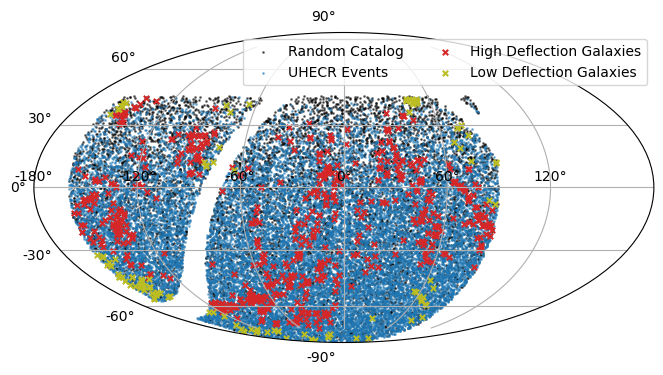

In [73]:

# Create figure with three Mollweide subplots
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'mollweide'}, figsize=(8, 6))

def format_axes(ax):
    """Format axes with RA in hours and Dec in degrees."""
    # RA ticks every 60 degrees (converted to hours)
    xticks_deg = np.arange(-180, 180, 60)
    xticks_rad = np.radians(xticks_deg)# - np.pi # Shift RA to center at 180 degrees
    xtick_labels = [f'{int(deg/15)}h' for deg in xticks_deg]
    ax.set_xticks(xticks_rad)
    ax.set_xticklabels([f'{deg}°' for deg in xticks_deg])
    
    # Dec ticks every 30 degrees
    yticks_deg = np.arange(-90, 91, 30)
    yticks_rad = np.radians(yticks_deg)
    ax.set_yticks(yticks_rad)
    ax.set_yticklabels([f'{deg}°' for deg in yticks_deg])
    ax.grid(True)


# Cut UHECR Events (ecat)
ra_ecat = events_a8['RA']
dec_ecat = events_a8['dec']
ra_ecat[ra_ecat > 180.] = ra_ecat[ra_ecat > 180.] - 360.
ra_rad_ecat = np.radians(ra_ecat)# - np.pi
dec_rad_ecat = np.radians(dec_ecat)

# Cut Random Catalog (rcat)
ra_rcat = ra_rand
dec_rcat = dec_rand
ra_rcat[ra_rcat > 180.] = ra_rcat[ra_rcat > 180.] - 360.
ra_rad_rcat = np.radians(ra_rcat)# - np.pi
dec_rad_rcat = np.radians(dec_rcat)

# Cut Galaxy Data
ra_data_def = data['_RAJ2000'][gxs['deflection'] > 25.]
dec_data_def = data['_DEJ2000'][gxs['deflection'] > 25.]
ra_data_nodef = data['_RAJ2000'][gxs['deflection'] <= 25.]
dec_data_nodef = data['_DEJ2000'][gxs['deflection'] <= 25.]

ra_data_def[ra_data_def > 180.] = ra_data_def[ra_data_def > 180.] - 360.
ra_data_nodef[ra_data_nodef > 180.] = ra_data_nodef[ra_data_nodef > 180.] - 360.

ra_rad_def_data = np.radians(ra_data_def)# - np.pi
dec_rad_def_data = np.radians(dec_data_def)

ra_rad_nodef_data = np.radians(ra_data_nodef)# - np.pi
dec_rad_nodef_data = np.radians(dec_data_nodef)


# Additional cuts - Create SEPARATE masks for each dataset
# For High Deflection Galaxies
ra_min = -160
ra_max = 90
mask_def = (ra_rad_def_data > np.radians(ra_min))&(ra_rad_def_data < np.radians(ra_max))
ra_rad_def_data = ra_rad_def_data[mask_def]
dec_rad_def_data = dec_rad_def_data[mask_def]

# For Low Deflection Galaxies (use THEIR OWN RA values)
mask_nodef = (ra_rad_nodef_data > np.radians(ra_min))&(ra_rad_nodef_data < np.radians(ra_max))
ra_rad_nodef_data = ra_rad_nodef_data[mask_nodef]
dec_rad_nodef_data = dec_rad_nodef_data[mask_nodef]

# For Random Catalog (rcat)
mask_rcat = (ra_rad_rcat > np.radians(ra_min))&(ra_rad_rcat < np.radians(ra_max))
ra_rad_rcat = ra_rad_rcat[mask_rcat]
dec_rad_rcat = dec_rad_rcat[mask_rcat]

# For UHECR Events (ecat)
mask_ecat = (ra_rad_ecat > np.radians(ra_min))&(ra_rad_ecat < np.radians(ra_max))
ra_rad_ecat = ra_rad_ecat[mask_ecat]
dec_rad_ecat = dec_rad_ecat[mask_ecat]

# Plot
ax.scatter(ra_rad_rcat, dec_rad_rcat, s=1, color='k', alpha=.5, label='Random Catalog')
ax.scatter(ra_rad_ecat, dec_rad_ecat, s=1, color='C00', alpha=0.5, label='UHECR Events')
ax.scatter(ra_rad_def_data, dec_rad_def_data, s=15, color='C03', marker='x', alpha=1, label='High Deflection Galaxies')
ax.scatter(ra_rad_nodef_data, dec_rad_nodef_data, s=15, color='C08', marker='x', alpha=1, label='Low Deflection Galaxies')

plt.legend(loc='upper right', fontsize=10, ncol=2)
format_axes(ax)
#plt.tight_layout()
plt.show()


In [ ]:

xi_bs, varxi_bs = [], []
for q in range(params['nquant']):
    print(f'{q + 1}/{params["nquant"]}')
    results = get_xibs(data[q], params['nbootstrap'], params['nbins'], rcat[q], ecat, treecorr_config)
    xi_bs.append(results[0])
    varxi_bs.append(results[1])
th = results[2]

In [51]:
ra_rcat_new = ra_rand[ra_rand > 180.] - 360.
print(ra_rand.min(), ra_rand.max()) 
print(ra_rcat_new.min(), ra_rcat_new.max()) 

1.013609489778592 359.1948136907962
-179.88290255315476 -0.8051863092038047
